In [1]:
import hnn_core
from hnn_core import jones_2009_model, read_params, simulate_dipole
from hnn_core.viz import plot_dipole
import matplotlib.pyplot as plt

In [2]:
#fparams = "param_files/default.param"
fparams = "param_files/TEP_from_def_Liz_2newInputs_optimized.param"
params = read_params(fparams)
#print(len(params))

In [3]:
net = jones_2009_model(params=params, add_drives_from_params=True)

tstop = 300.

In [4]:
dpls = simulate_dipole(net, tstop=tstop,)

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Loading custom mechanism files from c:\Users\jacob\anaconda3\Lib\site-packages\hnn_core\mod\nrnmech.dll
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Trial 1: 170.0 ms...
Trial 1: 180.0 ms...
Trial 1: 190.0 ms...
Trial 1: 200.0 ms...
Trial 1: 210.0 ms...
Trial 1: 220.0 ms...
Trial 1: 230.0 ms...
Trial 1: 240.0 ms...
Trial 1: 250.0 ms...
Trial 1: 260.0 ms...
Trial 1: 270.0 ms...
Trial 1: 280.0 ms...
Trial 1: 290.0 ms...


In [5]:
window_len = 30 # ms
scaling_factor = 3000
for dpl in dpls:
    dpl.smooth(window_len).scale(scaling_factor)

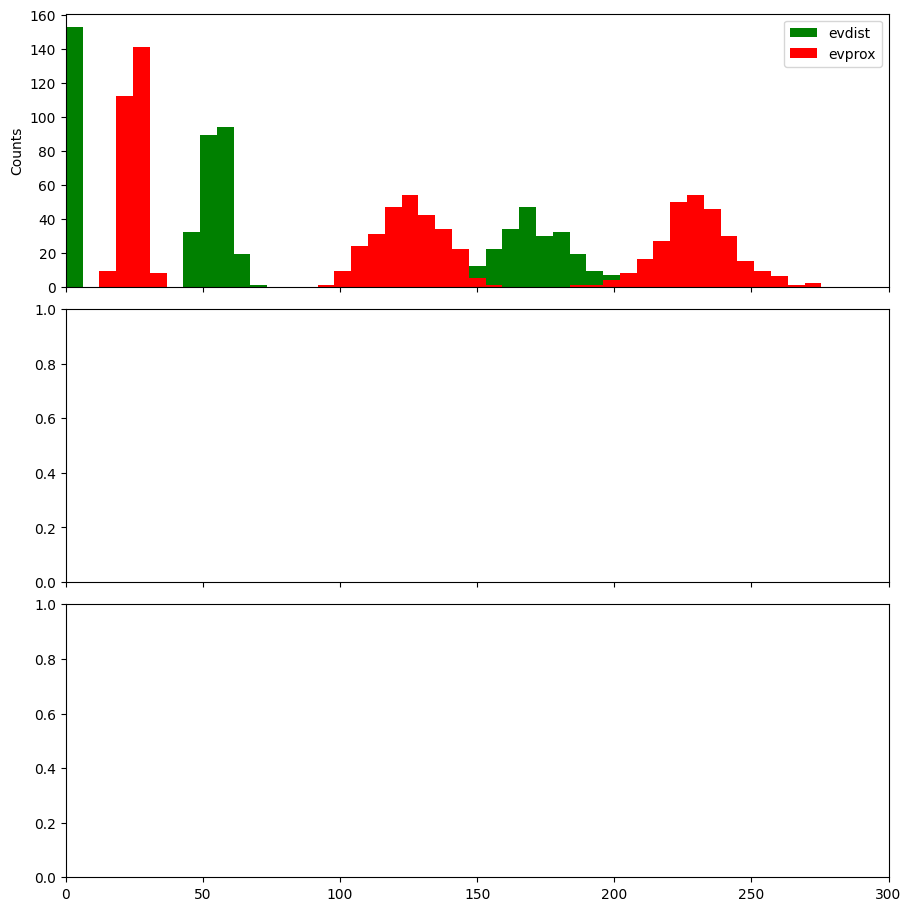

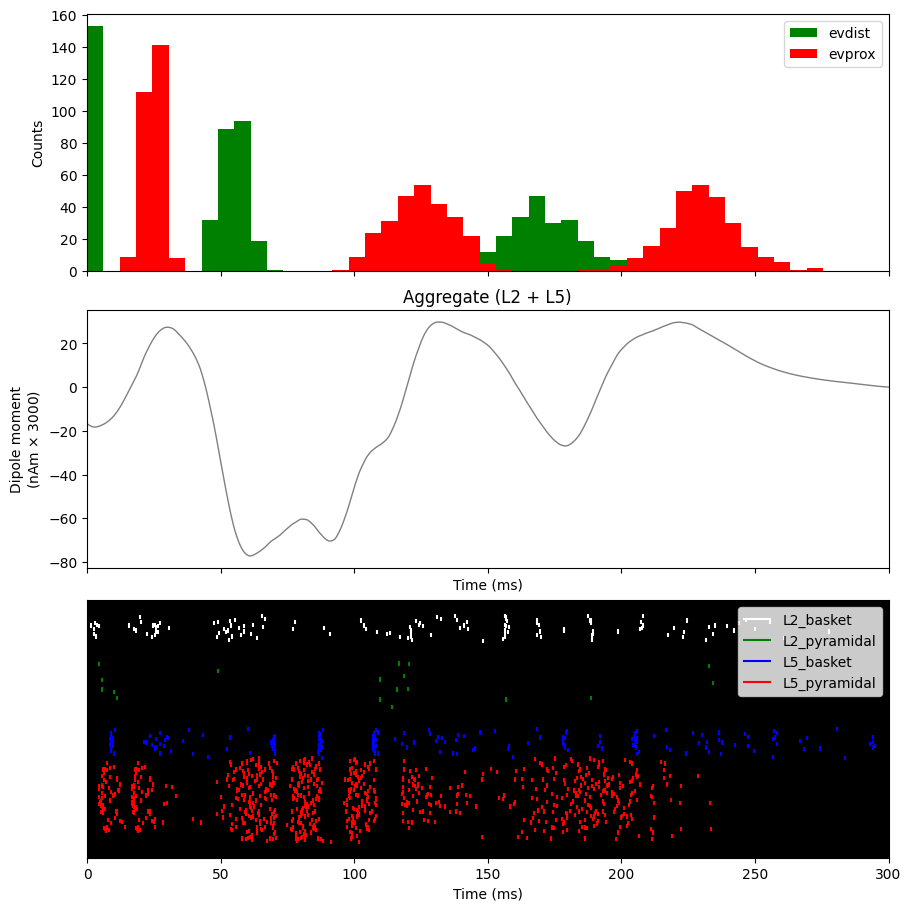

In [10]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(9, 9),
                         constrained_layout=True)
net.cell_response.plot_spikes_hist(ax=axes[0],
                                   spike_types=['evprox', 'evdist'])
plot_dipole(dpls, ax=axes[1], layer='agg', show=False)
net.cell_response.plot_spikes_raster(ax=axes[2])